In [ ]:
## This notebook is used to average yearly u-component wind data into case year data
## Also used to plot the case year data, and the case year compared to climatology

## created by Kendra Herweck

In [1]:
import netCDF4 as nc
import numpy as np
import datetime as dt  # Python standard library datetime  module
from netCDF4 import Dataset  # http://code.google.com/p/netcdf4-python/
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from astropy.table import Table
from astropy.io import ascii
from pandas import read_csv
from matplotlib.dates import DateFormatter
from pandas import DataFrame
from pandas import Grouper
import matplotlib.dates as mdates
import cartopy.crs as ccrs
import xarray as xr
from glob import glob

## Climatological Wind Speed Avg

In [2]:
filename_list=[]
for i in range(1980,2021):
    filename = 'Data/Wind-Data/ERA/Yearly/ERA-WindSpeed-{}.nc'.format(i)
    filename_list.append(filename)

#print(filename_list)
combined_ds = xr.open_mfdataset(filename_list)
print(combined_ds['U'].values)

[[[    nan     nan     nan ...     nan     nan     nan]
  [ 5.8125  5.8125  5.8125 ...  5.8125  5.8125  5.8125]
  [ 5.625   5.6875  5.6875 ...  5.625   5.625   5.625 ]
  ...
  [-5.1875 -5.125  -5.125  ... -5.1875 -5.1875 -5.1875]
  [-5.3125 -5.3125 -5.3125 ... -5.375  -5.375  -5.375 ]
  [-5.5    -5.4375 -5.4375 ... -5.5625 -5.5    -5.5   ]]

 [[    nan     nan     nan ...     nan     nan     nan]
  [ 1.4375  1.4375  1.5    ...  1.375   1.375   1.4375]
  [ 1.375   1.375   1.4375 ...  1.3125  1.3125  1.375 ]
  ...
  [-6.25   -6.25   -6.25   ... -6.25   -6.25   -6.25  ]
  [-6.3125 -6.3125 -6.3125 ... -6.3125 -6.3125 -6.3125]
  [-6.375  -6.375  -6.375  ... -6.375  -6.375  -6.375 ]]

 [[    nan     nan     nan ...     nan     nan     nan]
  [ 4.75    4.8125  4.8125 ...  4.75    4.75    4.75  ]
  [ 4.5625  4.5625  4.5625 ...  4.5625  4.5625  4.5625]
  ...
  [-2.9375 -2.875  -2.8125 ... -3.0625 -3.     -3.    ]
  [-3.     -3.     -2.9375 ... -3.125  -3.125  -3.0625]
  [-3.125  -3.0625 -3.    

In [3]:
clim_avg = combined_ds.mean('time')
print(clim_avg['U'].values)

[[        nan         nan         nan ...         nan         nan
          nan]
 [ 2.55487805  2.55792683  2.56402439 ...  2.55945122  2.55640244
   2.55792683]
 [ 2.42530488  2.42682927  2.42987805 ...  2.42530488  2.42682927
   2.42378049]
 ...
 [-5.41158537 -5.38719512 -5.36890244 ... -5.45121951 -5.43292683
  -5.42073171]
 [-5.45579268 -5.43902439 -5.42378049 ... -5.49847561 -5.48323171
  -5.46036585]
 [-5.5        -5.48628049 -5.4679878  ... -5.53658537 -5.5304878
  -5.50914634]]


C:\Users\kherweck\Miniconda3\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [4]:
print(clim_avg)

<xarray.Dataset>
Dimensions:  (x: 1440, y: 321)
Dimensions without coordinates: x, y
Data variables:
    lat      (y) float64 dask.array<chunksize=(321,), meta=np.ndarray>
    lon      (x) float64 dask.array<chunksize=(1440,), meta=np.ndarray>
    U        (y, x) float64 dask.array<chunksize=(321, 1440), meta=np.ndarray>


C:\Users\kherweck\Miniconda3\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


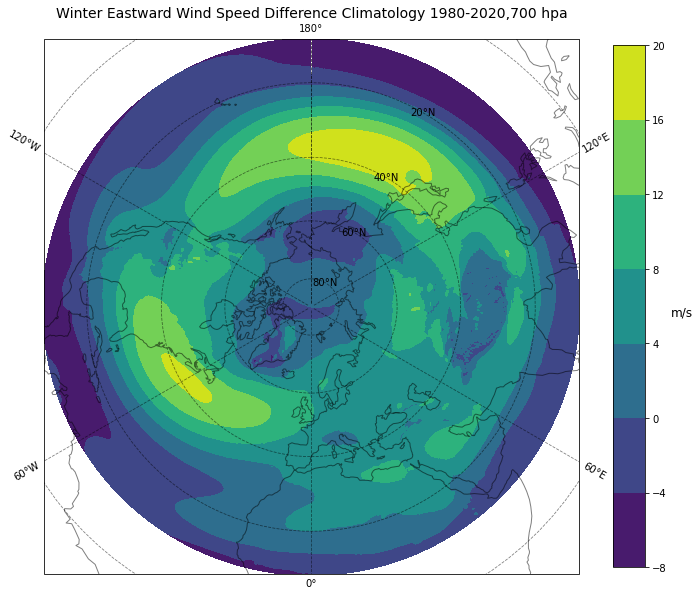

In [5]:
#file1 = 'EPNino_WindSpeed-10deg_detrended-data_700hPa.nc'
#ds1 = xr.open_mfdataset(file1)    
#file2 = '30yearWindSpeed-10deg.nc' 
#ds2 = xr.open_mfdataset(file2) 

lat = clim_avg.variables['lat']
lon = clim_avg.variables['lon']

wind=clim_avg['U'][:,:]  ## eastern pacific el nino
#wind2=ds2['U'][0,:]  ## climatology
#wind = wind1-wind2   ##


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-4, 4, 11)
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree())
plt.title('Winter Eastward Wind Speed Difference Climatology 1980-2020,700 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

## Low SIC Years Avg

In [6]:
filename_list=[]
for i in (1950,1951,1952,1955,1958,1959,1961,1964,1966,1968,1970,1971,1974,1976,1977,1979,1981,1984,1987,1989,1990,1993,
       1995,1997,1998,1999,2002,2005,2007,2010,2011,2012,2015,2016,2019,2020):
    filename = 'Data/Wind-Data/ERA/Yearly/ERA-WindSpeed-{}.nc'.format(i)
    filename_list.append(filename)

#print(filename_list)
combined_ds = xr.open_mfdataset(filename_list)
print(combined_ds)

<xarray.Dataset>
Dimensions:  (time: 36, x: 1440, y: 321)
Coordinates:
  * time     (time) float64 1.95e+03 1.951e+03 1.952e+03 ... 2.019e+03 2.02e+03
Dimensions without coordinates: x, y
Data variables:
    lat      (time, y) float64 dask.array<chunksize=(1, 321), meta=np.ndarray>
    lon      (time, x) float64 dask.array<chunksize=(1, 1440), meta=np.ndarray>
    U        (time, y, x) float64 dask.array<chunksize=(1, 321, 1440), meta=np.ndarray>


In [8]:
lowsic_avg = combined_ds.mean('time')
print(lowsic_avg['U'].values)

[[        nan         nan         nan ...         nan         nan
          nan]
 [ 2.44444444  2.44097222  2.51428571 ...  2.44965278  2.44965278
   2.44791667]
 [ 2.30034722  2.296875    2.29861111 ...  2.36428571  2.36607143
   2.29861111]
 ...
 [-4.81770833 -4.79340278 -4.77083333 ... -4.87673611 -4.85763889
  -4.83159722]
 [-4.828125   -4.80034722 -4.78472222 ... -4.88368056 -4.86284722
  -4.84027778]
 [-4.83159722 -4.81597222 -4.79340278 ... -4.88888889 -4.86805556
  -4.84895833]]


C:\Users\kherweck\Miniconda3\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


C:\Users\kherweck\Miniconda3\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


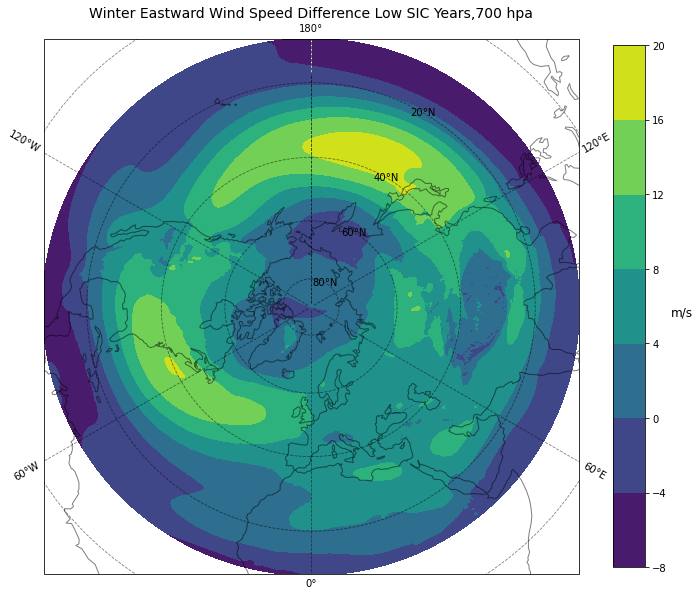

In [9]:
lat = lowsic_avg.variables['lat']
lon = lowsic_avg.variables['lon']

wind=lowsic_avg['U'][:,:]  ## eastern pacific el nino
#wind2=ds2['U'][0,:]  ## climatology
#wind = wind1-wind2   ##


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-4, 4, 11)
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree())
plt.title('Winter Eastward Wind Speed Difference Low SIC Years,700 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

## Low SIC & EP Nino Avg

In [10]:
##Years: 1952,1970,1977,1987,1998,2007,2012

filename_list=[]
for i in (1952,1970,1977,1987,1998,2007,2012):
    filename = 'Data/Wind-Data/ERA/Yearly/ERA-WindSpeed-{}.nc'.format(i)
    filename_list.append(filename)

#print(filename_list)
combined_ds = xr.open_mfdataset(filename_list)
print(combined_ds)

<xarray.Dataset>
Dimensions:  (time: 7, x: 1440, y: 321)
Coordinates:
  * time     (time) float64 1.952e+03 1.97e+03 1.977e+03 ... 2.007e+03 2.012e+03
Dimensions without coordinates: x, y
Data variables:
    lat      (time, y) float64 dask.array<chunksize=(1, 321), meta=np.ndarray>
    lon      (time, x) float64 dask.array<chunksize=(1, 1440), meta=np.ndarray>
    U        (time, y, x) float64 dask.array<chunksize=(1, 321, 1440), meta=np.ndarray>


In [12]:
lowsic_ep_avg = combined_ds.mean('time')
print(lowsic_ep_avg['U'].values)

[[        nan         nan         nan ...         nan         nan
          nan]
 [ 3.08928571  3.07142857  3.07142857 ...  3.09821429  3.09821429
   3.09821429]
 [ 2.91071429  2.90178571  2.90178571 ...  2.92857143  2.92857143
   2.91964286]
 ...
 [-4.9375     -4.90178571 -4.89285714 ... -5.01785714 -4.99107143
  -4.96428571]
 [-4.94642857 -4.91964286 -4.89285714 ... -5.01785714 -5.
  -4.96428571]
 [-4.9375     -4.91964286 -4.88392857 ... -5.01785714 -4.98214286
  -4.97321429]]


C:\Users\kherweck\Miniconda3\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


C:\Users\kherweck\Miniconda3\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


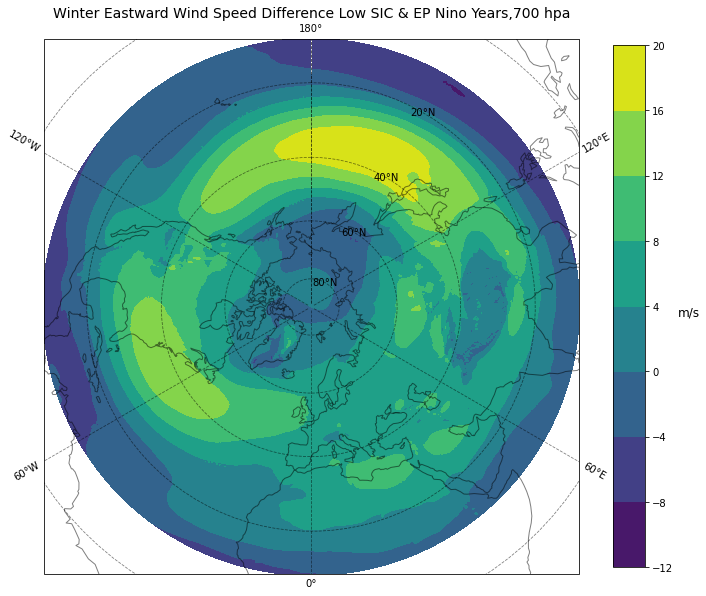

In [14]:
lat = lowsic_ep_avg.variables['lat']
lon = lowsic_ep_avg.variables['lon']

wind=lowsic_ep_avg['U'][:,:]  ## eastern pacific el nino
#wind2=ds2['U'][0,:]  ## climatology
#wind = wind1-wind2   ##


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-4, 4, 11)
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree())
plt.title('Winter Eastward Wind Speed Difference Low SIC & EP Nino Years,700 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

## Low SIC & CP Nino Avg

In [15]:
##Years: 1958,1959,1964,1966,1995,2005,2010,2015,2016,2020
filename_list=[]
for i in (1958,1959,1964,1966,1995,2005,2010,2015,2016,2020):
    filename = 'Data/Wind-Data/ERA/Yearly/ERA-WindSpeed-{}.nc'.format(i)
    filename_list.append(filename)

#print(filename_list)
combined_ds = xr.open_mfdataset(filename_list)
print(combined_ds)

<xarray.Dataset>
Dimensions:  (time: 10, x: 1440, y: 321)
Coordinates:
  * time     (time) float64 1.958e+03 1.959e+03 1.964e+03 ... 2.016e+03 2.02e+03
Dimensions without coordinates: x, y
Data variables:
    lat      (time, y) float64 dask.array<chunksize=(1, 321), meta=np.ndarray>
    lon      (time, x) float64 dask.array<chunksize=(1, 1440), meta=np.ndarray>
    U        (time, y, x) float64 dask.array<chunksize=(1, 321, 1440), meta=np.ndarray>


In [16]:
lowsic_cp_avg = combined_ds.mean('time')
print(lowsic_cp_avg['U'].values)

[[     nan      nan      nan ...      nan      nan      nan]
 [ 2.45625  2.45625  2.4625  ...  2.4625   2.45625  2.45625]
 [ 2.3375   2.34375  2.3375  ...  2.34375  2.3375   2.3375 ]
 ...
 [-5.325   -5.3     -5.26875 ... -5.3625  -5.3625  -5.31875]
 [-5.33125 -5.3     -5.2875  ... -5.3625  -5.3375  -5.33125]
 [-5.31875 -5.30625 -5.29375 ... -5.35    -5.35    -5.31875]]


C:\Users\kherweck\Miniconda3\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


C:\Users\kherweck\Miniconda3\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


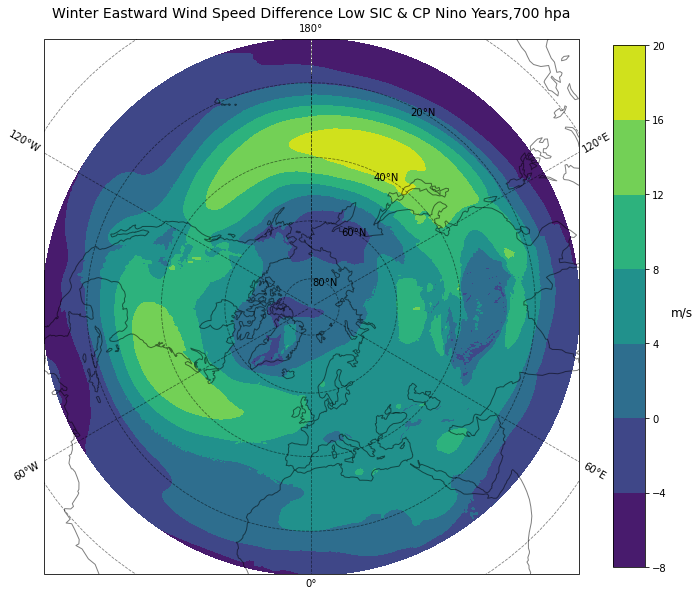

In [17]:
lat = lowsic_cp_avg.variables['lat']
lon = lowsic_cp_avg.variables['lon']

wind=lowsic_cp_avg['U'][:,:]  ## eastern pacific el nino
#wind2=ds2['U'][0,:]  ## climatology
#wind = wind1-wind2   ##


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-4, 4, 11)
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree())
plt.title('Winter Eastward Wind Speed Difference Low SIC & CP Nino Years,700 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

## All CP Nino Years

In [18]:
##Years: 1954,1958,1959,1964,1966,1969,1978,1988,1992,1995,2003,2005,2010,2015,2016,2020
filename_list=[]
for i in (1954,1958,1959,1964,1966,1969,1978,1988,1992,1995,2003,2005,2010,2015,2016,2020):
    filename = 'Data/Wind-Data/ERA/Yearly/ERA-WindSpeed-{}.nc'.format(i)
    filename_list.append(filename)

#print(filename_list)
combined_ds = xr.open_mfdataset(filename_list)
print(combined_ds)

<xarray.Dataset>
Dimensions:  (time: 16, x: 1440, y: 321)
Coordinates:
  * time     (time) float64 1.954e+03 1.958e+03 1.959e+03 ... 2.016e+03 2.02e+03
Dimensions without coordinates: x, y
Data variables:
    lat      (time, y) float64 dask.array<chunksize=(1, 321), meta=np.ndarray>
    lon      (time, x) float64 dask.array<chunksize=(1, 1440), meta=np.ndarray>
    U        (time, y, x) float64 dask.array<chunksize=(1, 321, 1440), meta=np.ndarray>


In [19]:
cp_avg = combined_ds.mean('time')
print(cp_avg['U'].values)

[[        nan         nan         nan ...         nan         nan
          nan]
 [ 2.26953125  2.26953125  2.28125    ...  2.265625    2.265625
   2.26953125]
 [ 2.1328125   2.140625    2.140625   ...  2.12890625  2.12890625
   2.12890625]
 ...
 [-5.05859375 -5.0234375  -4.9921875  ... -5.11328125 -5.10546875
  -5.0625    ]
 [-5.08203125 -5.04296875 -5.0234375  ... -5.140625   -5.109375
  -5.08984375]
 [-5.09375    -5.07421875 -5.046875   ... -5.1484375  -5.13671875
  -5.1015625 ]]


C:\Users\kherweck\Miniconda3\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


C:\Users\kherweck\Miniconda3\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


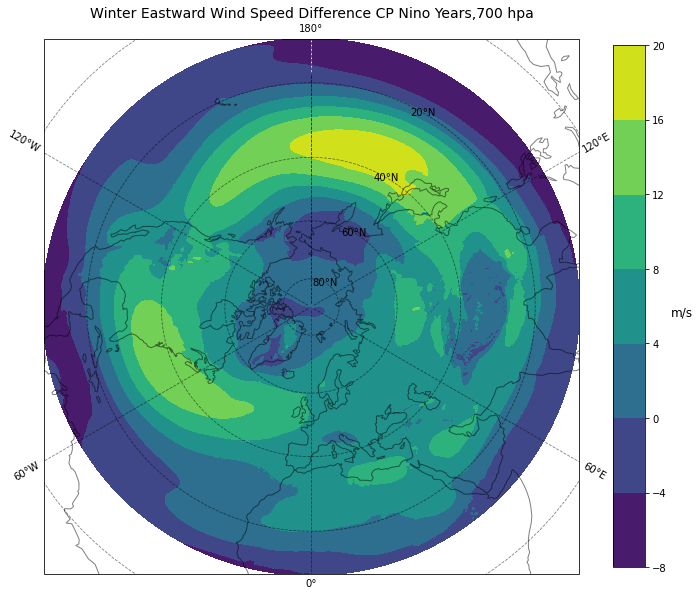

In [20]:
lat = cp_avg.variables['lat']
lon = cp_avg.variables['lon']

wind=cp_avg['U'][:,:]  ## eastern pacific el nino
#wind2=ds2['U'][0,:]  ## climatology
#wind = wind1-wind2   ##


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-4, 4, 11)
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree())
plt.title('Winter Eastward Wind Speed Difference CP Nino Years,700 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

## All EP Nino Years

In [21]:
##Years: 1952,1970,1973,1977,1983,1987,1998,2007,2012
filename_list=[]
for i in (1952,1970,1973,1977,1983,1987,1998,2007,2012):
    filename = 'Data/Wind-Data/ERA/Yearly/ERA-WindSpeed-{}.nc'.format(i)
    filename_list.append(filename)

#print(filename_list)
combined_ds = xr.open_mfdataset(filename_list)
print(combined_ds)

<xarray.Dataset>
Dimensions:  (time: 9, x: 1440, y: 321)
Coordinates:
  * time     (time) float64 1.952e+03 1.97e+03 1.973e+03 ... 2.007e+03 2.012e+03
Dimensions without coordinates: x, y
Data variables:
    lat      (time, y) float64 dask.array<chunksize=(1, 321), meta=np.ndarray>
    lon      (time, x) float64 dask.array<chunksize=(1, 1440), meta=np.ndarray>
    U        (time, y, x) float64 dask.array<chunksize=(1, 321, 1440), meta=np.ndarray>


In [22]:
ep_avg = combined_ds.mean('time')
print(ep_avg['U'].values)

[[        nan         nan         nan ...         nan         nan
          nan]
 [ 3.15972222  3.14583333  3.14583333 ...  3.15277778  3.15277778
   3.15277778]
 [ 2.97916667  2.97222222  2.97916667 ...  2.99305556  2.99305556
   2.98611111]
 ...
 [-4.6875     -4.64583333 -4.625      ... -4.79166667 -4.75694444
  -4.72222222]
 [-4.6875     -4.65277778 -4.61805556 ... -4.78472222 -4.75694444
  -4.71527778]
 [-4.67361111 -4.64583333 -4.60416667 ... -4.77777778 -4.73611111
  -4.71527778]]


C:\Users\kherweck\Miniconda3\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


C:\Users\kherweck\Miniconda3\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


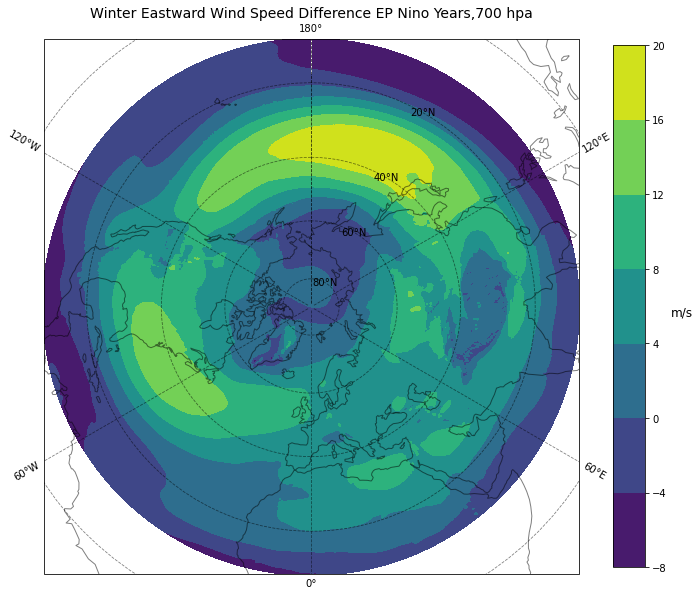

In [23]:
lat = ep_avg.variables['lat']
lon = ep_avg.variables['lon']

wind=ep_avg['U'][:,:]  ## eastern pacific el nino
#wind2=ds2['U'][0,:]  ## climatology
#wind = wind1-wind2   ##


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-4, 4, 11)
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree())
plt.title('Winter Eastward Wind Speed Difference EP Nino Years,700 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

# Difference Plots

### Low SIC - Climatology

C:\Users\kherweck\Miniconda3\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


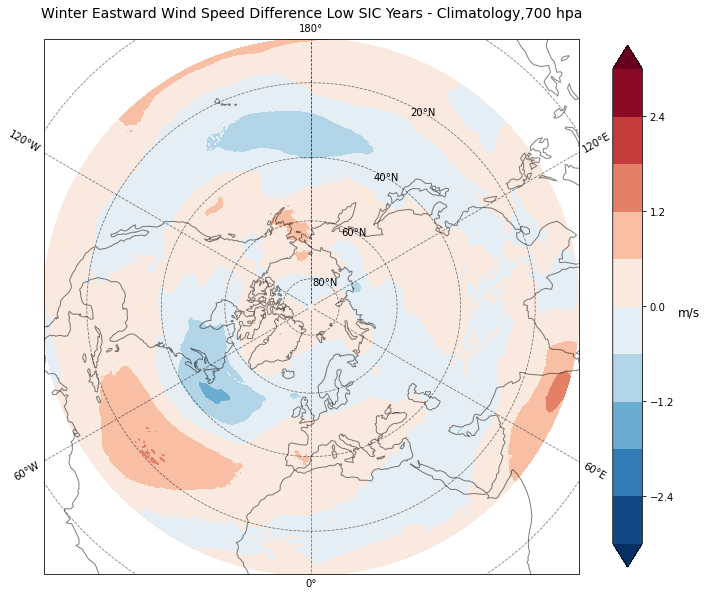

In [39]:
lat = clim_avg.variables['lat']
lon = clim_avg.variables['lon']

wind1=clim_avg['U'][:,:]  ## 
wind2=lowsic_avg['U'][:,:]  ## 
wind = wind2-wind1   ##


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-3, 3, 11)
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
plt.title('Winter Eastward Wind Speed Difference Low SIC Years - Climatology,700 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

### EP Nino - Climatology

C:\Users\kherweck\Miniconda3\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


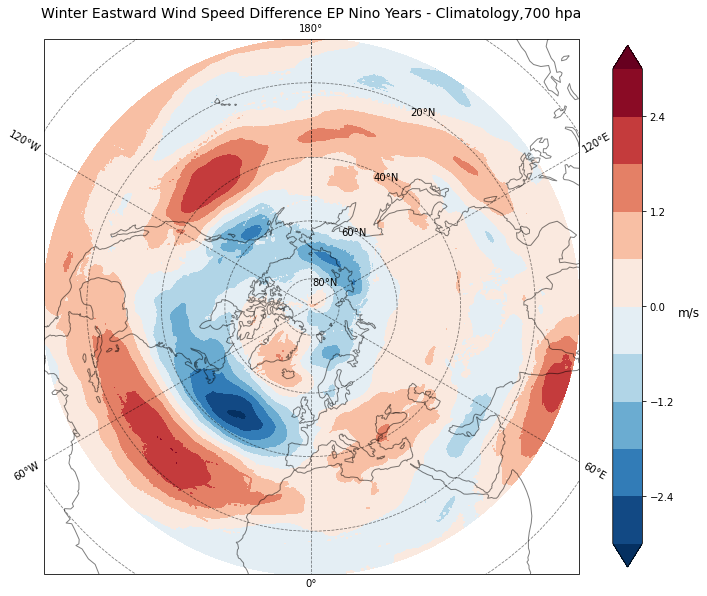

In [40]:
lat = clim_avg.variables['lat']
lon = clim_avg.variables['lon']

wind1=clim_avg['U'][:,:]  ## 
wind2=ep_avg['U'][:,:]  ##
wind = wind2-wind1   ##


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-3, 3, 11)
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
plt.title('Winter Eastward Wind Speed Difference EP Nino Years - Climatology,700 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

### CP Nino - Climatology

C:\Users\kherweck\Miniconda3\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


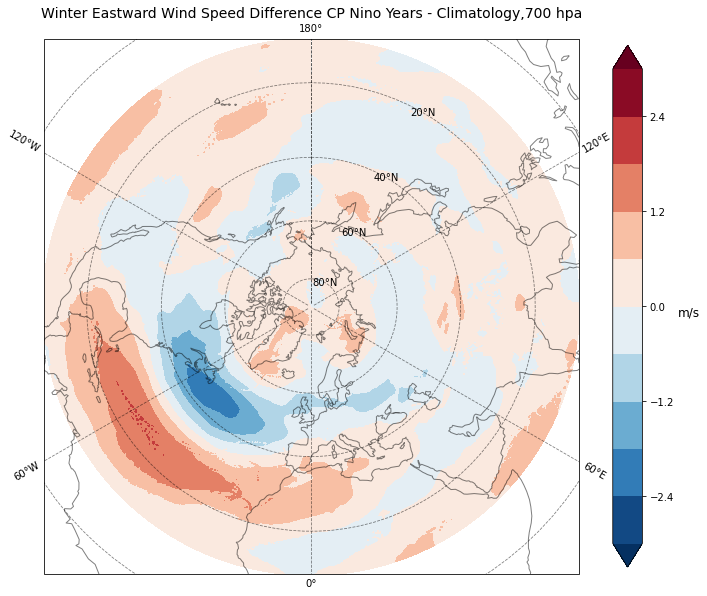

In [41]:
lat = clim_avg.variables['lat']
lon = clim_avg.variables['lon']

wind1=clim_avg['U'][:,:]  ## 
wind2=cp_avg['U'][:,:]  ##
wind = wind2-wind1   ##


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-3, 3, 11)
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
plt.title('Winter Eastward Wind Speed Difference CP Nino Years - Climatology,700 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

### Low SIC & EP Nino - Climatology

C:\Users\kherweck\Miniconda3\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


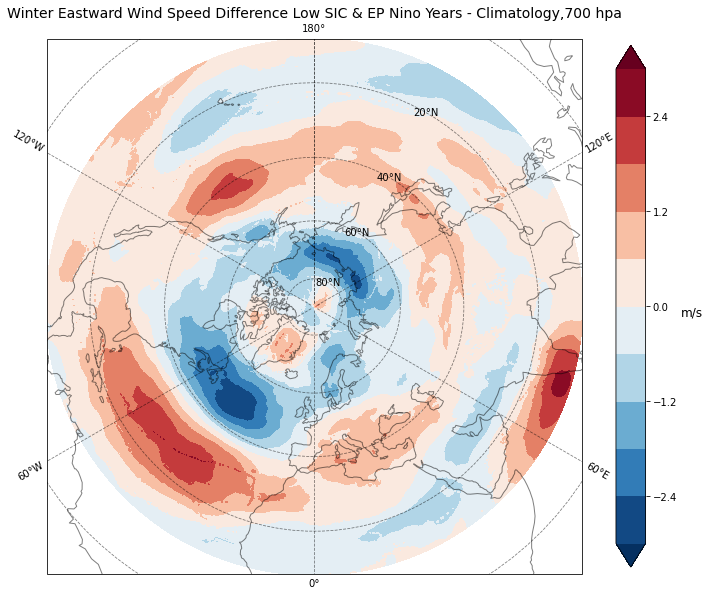

In [42]:
lat = clim_avg.variables['lat']
lon = clim_avg.variables['lon']

wind1=clim_avg['U'][:,:]  ## 
wind2=lowsic_ep_avg['U'][:,:]  ##
wind = wind2-wind1   ##


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-3, 3, 11)
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
plt.title('Winter Eastward Wind Speed Difference Low SIC & EP Nino Years - Climatology,700 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

### Low SIC & CP Nino - Climatology

C:\Users\kherweck\Miniconda3\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


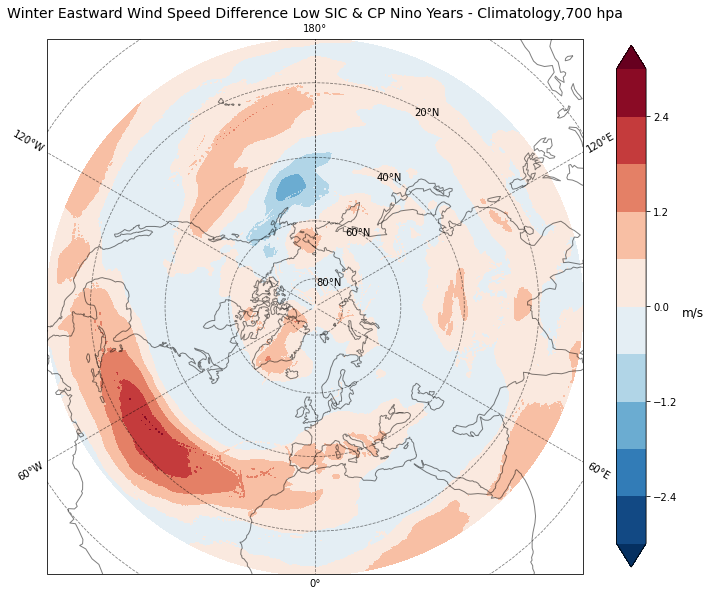

In [43]:
lat = clim_avg.variables['lat']
lon = clim_avg.variables['lon']

wind1=clim_avg['U'][:,:]  ## 
wind2=lowsic_cp_avg['U'][:,:]  ##
wind = wind2-wind1   ##


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-3, 3, 11)
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
plt.title('Winter Eastward Wind Speed Difference Low SIC & CP Nino Years - Climatology,700 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

# Difference Plots - US Focus

### Low SIC - Climatology

C:\Users\kherweck\Miniconda3\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


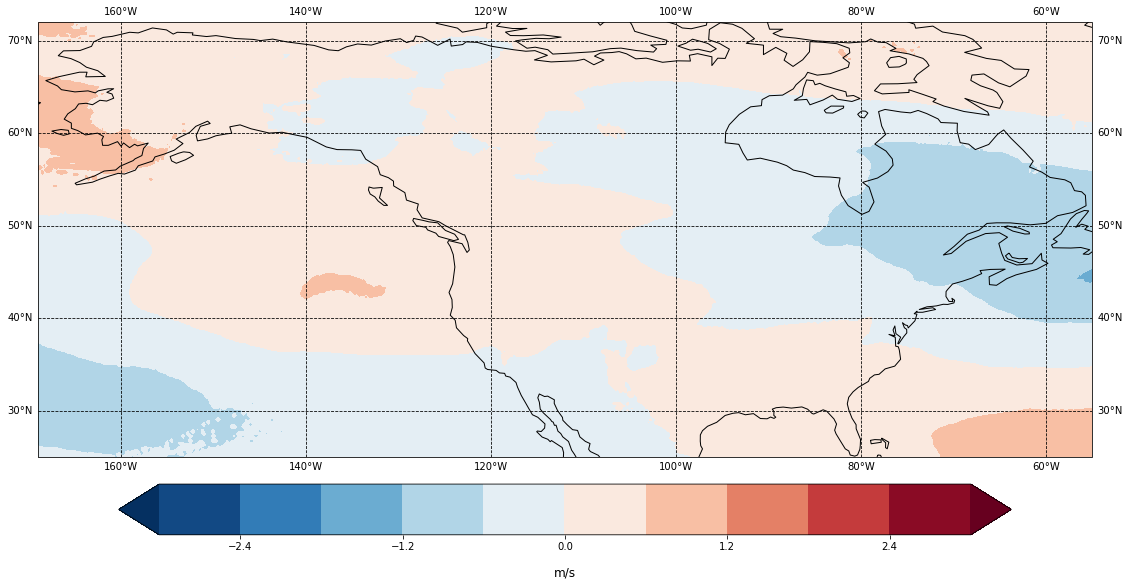

In [48]:
#f = nc.Dataset('ElNino_LowSICYears_Temp_detrended-data.nc', 'r')  #low sic & el nino years
#f2=nc.Dataset('Climatological_Temp_detrended-data.nc','r')  #climatology

lat = clim_avg.variables['lat']
lon = clim_avg.variables['lon']


wind1=clim_avg['U'][:,:]  ## 
wind2=lowsic_avg['U'][:,:]  ##
wind = wind2-wind1   ##



fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-169,-55,25,72],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels=np.linspace(-3,3,11)
plt.contourf(lons, lats, wind,transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, temp,transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
cb = plt.colorbar(ax=ax, orientation="horizontal",pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#cs=plt.contour(lons,lats,climwind,colors='black',transform=ccrs.PlateCarree())
#plt.clabel(cs, fontsize=9, inline=True)
#plt.title('Average Winter Temperature Difference (Low SIC vs.Climatological Avg 1980-2020)', size=14)
#cs=plt.contour(lons,lats,climwind30,colors='black',transform=ccrs.PlateCarree())

### EP Nino - Climatology

C:\Users\kherweck\Miniconda3\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


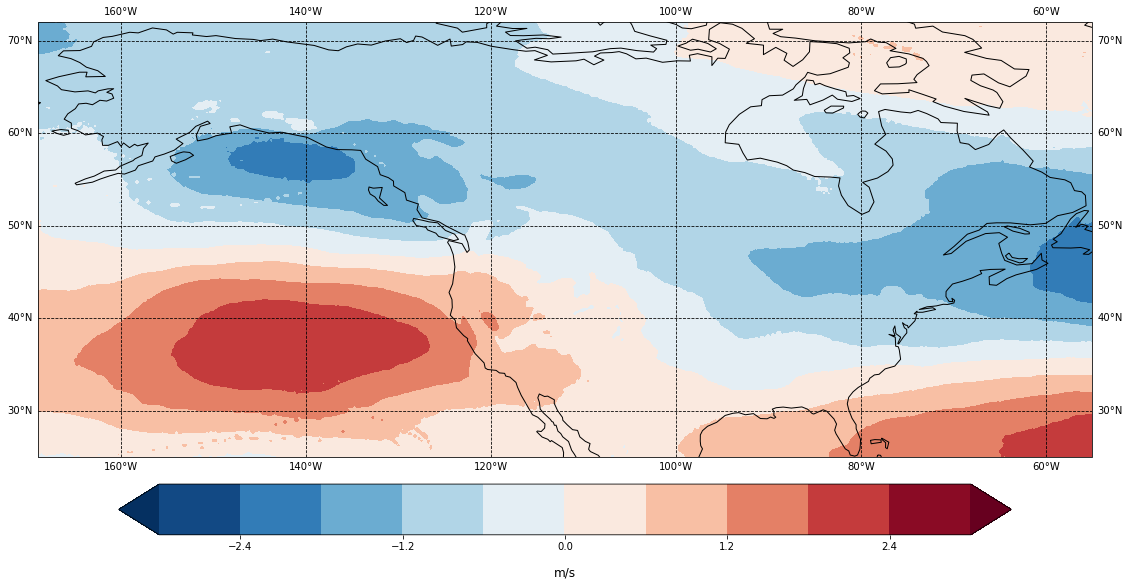

In [49]:
#f = nc.Dataset('ElNino_LowSICYears_Temp_detrended-data.nc', 'r')  #low sic & el nino years
#f2=nc.Dataset('Climatological_Temp_detrended-data.nc','r')  #climatology

lat = clim_avg.variables['lat']
lon = clim_avg.variables['lon']


wind1=clim_avg['U'][:,:]  ## 
wind2=ep_avg['U'][:,:]  ##
wind = wind2-wind1   ##



fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-169,-55,25,72],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels=np.linspace(-3,3,11)
plt.contourf(lons, lats, wind,transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, temp,transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
cb = plt.colorbar(ax=ax, orientation="horizontal",pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#cs=plt.contour(lons,lats,climwind,colors='black',transform=ccrs.PlateCarree())
#plt.clabel(cs, fontsize=9, inline=True)
#plt.title('Average Winter Temperature Difference (Low SIC vs.Climatological Avg 1980-2020)', size=14)
#cs=plt.contour(lons,lats,climwind30,colors='black',transform=ccrs.PlateCarree())

### CP Nino - Climatology

C:\Users\kherweck\Miniconda3\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


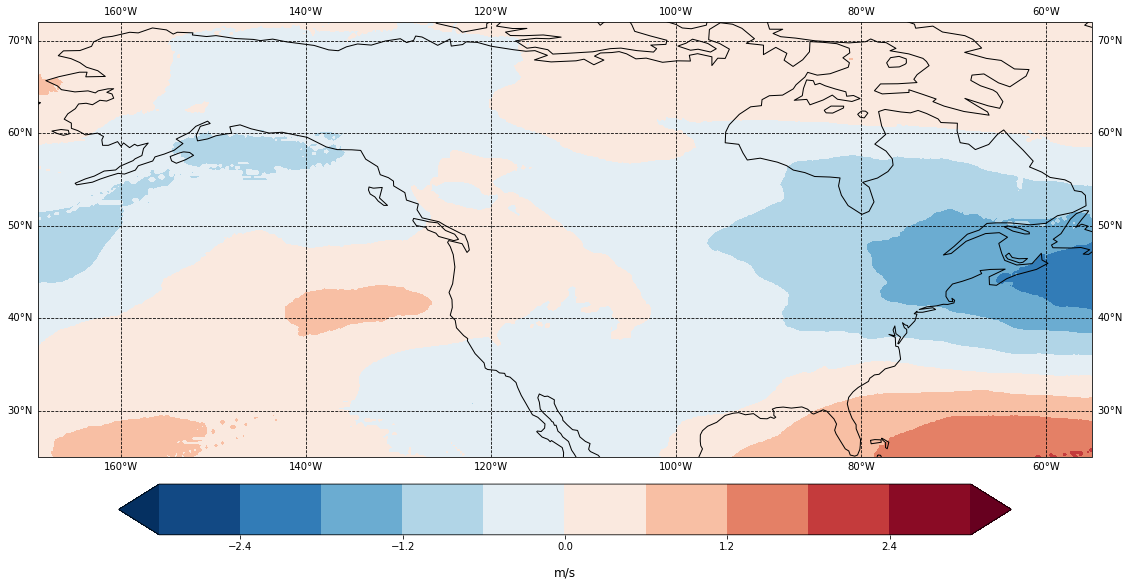

In [50]:
#f = nc.Dataset('ElNino_LowSICYears_Temp_detrended-data.nc', 'r')  #low sic & el nino years
#f2=nc.Dataset('Climatological_Temp_detrended-data.nc','r')  #climatology

lat = clim_avg.variables['lat']
lon = clim_avg.variables['lon']


wind1=clim_avg['U'][:,:]  ## 
wind2=cp_avg['U'][:,:]  ##
wind = wind2-wind1   ##



fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-169,-55,25,72],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels=np.linspace(-3,3,11)
plt.contourf(lons, lats, wind,transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, temp,transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
cb = plt.colorbar(ax=ax, orientation="horizontal",pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#cs=plt.contour(lons,lats,climwind,colors='black',transform=ccrs.PlateCarree())
#plt.clabel(cs, fontsize=9, inline=True)
#plt.title('Average Winter Temperature Difference (Low SIC vs.Climatological Avg 1980-2020)', size=14)
#cs=plt.contour(lons,lats,climwind30,colors='black',transform=ccrs.PlateCarree())

### Low SIC & EP Nino - Climatology

C:\Users\kherweck\Miniconda3\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


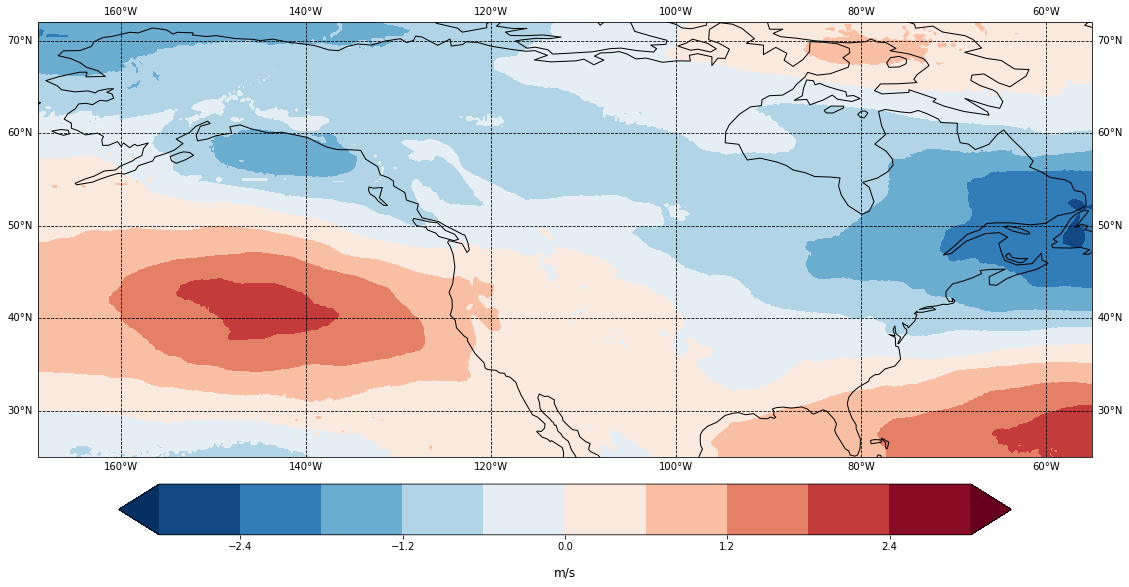

In [51]:
#f = nc.Dataset('ElNino_LowSICYears_Temp_detrended-data.nc', 'r')  #low sic & el nino years
#f2=nc.Dataset('Climatological_Temp_detrended-data.nc','r')  #climatology

lat = clim_avg.variables['lat']
lon = clim_avg.variables['lon']


wind1=clim_avg['U'][:,:]  ## 
wind2=lowsic_ep_avg['U'][:,:]  ##
wind = wind2-wind1   ##



fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-169,-55,25,72],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels=np.linspace(-3,3,11)
plt.contourf(lons, lats, wind,transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, temp,transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
cb = plt.colorbar(ax=ax, orientation="horizontal",pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#cs=plt.contour(lons,lats,climwind,colors='black',transform=ccrs.PlateCarree())
#plt.clabel(cs, fontsize=9, inline=True)
#plt.title('Average Winter Temperature Difference (Low SIC vs.Climatological Avg 1980-2020)', size=14)
#cs=plt.contour(lons,lats,climwind30,colors='black',transform=ccrs.PlateCarree())

### Low SIC & CP Nino - Climatology

C:\Users\kherweck\Miniconda3\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


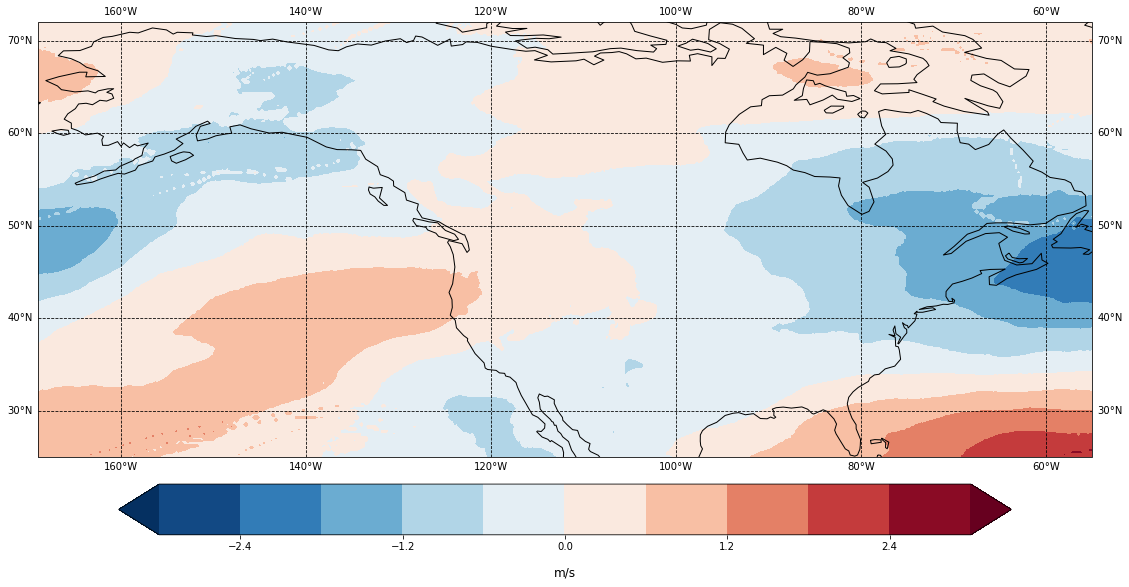

In [52]:
#f = nc.Dataset('ElNino_LowSICYears_Temp_detrended-data.nc', 'r')  #low sic & el nino years
#f2=nc.Dataset('Climatological_Temp_detrended-data.nc','r')  #climatology

lat = clim_avg.variables['lat']
lon = clim_avg.variables['lon']


wind1=clim_avg['U'][:,:]  ## 
wind2=lowsic_cp_avg['U'][:,:]  ##
wind = wind2-wind1   ##



fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-169,-55,25,72],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels=np.linspace(-3,3,11)
plt.contourf(lons, lats, wind,transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, temp,transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
cb = plt.colorbar(ax=ax, orientation="horizontal",pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#cs=plt.contour(lons,lats,climwind,colors='black',transform=ccrs.PlateCarree())
#plt.clabel(cs, fontsize=9, inline=True)
#plt.title('Average Winter Temperature Difference (Low SIC vs.Climatological Avg 1980-2020)', size=14)
#cs=plt.contour(lons,lats,climwind30,colors='black',transform=ccrs.PlateCarree())